In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales=pd.read_csv('sales.csv')
sales.head(10)

,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2
5,6,A,Chicago,Normal,Male,Shampoo,Stationery,11.24,9,7.08,108.24,0
6,7,A,Chicago,Normal,Male,Shampoo,Personal Care,10.71,1,0.75,11.46,0
7,8,B,Los Angeles,Normal,Female,Shampoo,Household,18.23,9,11.48,175.55,0
8,9,A,Chicago,Member,Female,Apple,Fruits,14.15,20,19.81,302.81,30
9,10,B,Los Angeles,Member,Male,Shampoo,Fruits,18.42,19,24.50,374.48,37


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_id           1000 non-null   int64  
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_name      1000 non-null   object 
 6   product_category  1000 non-null   object 
 7   unit_price        1000 non-null   float64
 8   quantity          1000 non-null   int64  
 9   tax               1000 non-null   float64
 10  total_price       1000 non-null   float64
 11  reward_points     1000 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


In [4]:
sales.isnull().sum()

sale_id             0
branch              0
city                0
customer_type       0
gender              0
product_name        0
product_category    0
unit_price          0
quantity            0
tax                 0
total_price         0
reward_points       0
dtype: int64

In [5]:
sales['city'].value_counts()

city
New York       344
Chicago        330
Los Angeles    326
Name: count, dtype: int64

In [6]:
sales['total_price'].sum()

np.float64(118583.9)

In [7]:
sales['total_price'].mean()

np.float64(118.5839)

In [8]:
sales.groupby('product_category')['total_price'].sum().sort_values()

product_category
Stationery       20737.11
Household        21615.84
Beverages        22983.32
Fruits           26197.45
Personal Care    27050.18
Name: total_price, dtype: float64

In [9]:
sales.groupby('product_category')['quantity'].sum().sort_values()

product_category
Household        1908
Stationery       1913
Beverages        1952
Personal Care    2278
Fruits           2286
Name: quantity, dtype: int64

In [10]:
sales.groupby('branch')['total_price'].sum().sort_values()

branch
B    35772.26
A    82811.64
Name: total_price, dtype: float64

In [11]:
(sales.groupby('customer_type')['total_price'].mean())

customer_type
Member    122.507035
Normal    114.401384
Name: total_price, dtype: float64

In [12]:
(sales.groupby('customer_type')['total_price'].mean())> (sales['total_price'].mean())

customer_type
Member     True
Normal    False
Name: total_price, dtype: bool

<Axes: title={'center': 'product_category'}, xlabel='product_category'>

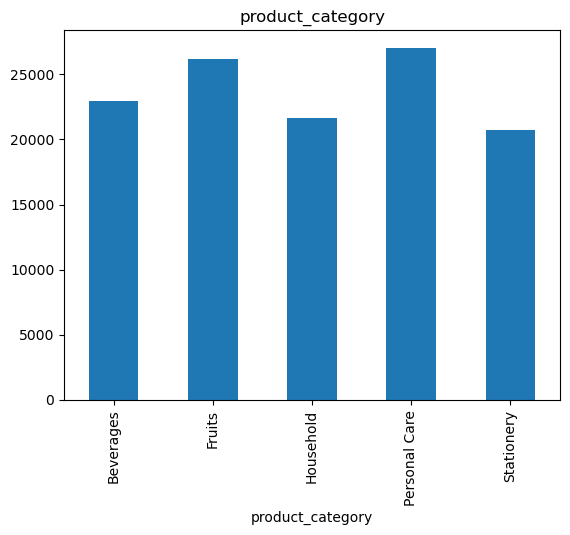

In [13]:
sales.groupby('product_category')['total_price'].sum().plot(kind='bar' ,title="product_category")

<Axes: ylabel='total_price'>

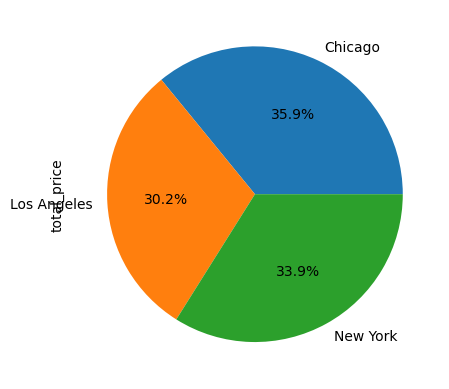

In [14]:
sales.groupby('city')['total_price'].sum().plot(kind='pie', autopct='%1.1f%%')

### Who is our most valuable customer?

In [15]:
sales.groupby(['gender','customer_type'])['total_price'].mean().sort_values()

gender  customer_type
Female  Normal           106.083273
Male    Normal           121.333144
        Member           122.297348
Female  Member           122.726706
Name: total_price, dtype: float64

Female who are club members spend the most money on average

#### What is the most common price range in the store? Are most products dollar 0-5, or do we have a lot of expensive products that cost $ 15+?


In [16]:
Cheap=(sales['unit_price']<5).sum()
Intermediate=(sales['unit_price'].between(5,15)).sum()
Boutique=(sales['unit_price']>15).sum()

In [17]:
Cheap,Intermediate,Boutique

(np.int64(203), np.int64(505), np.int64(292))

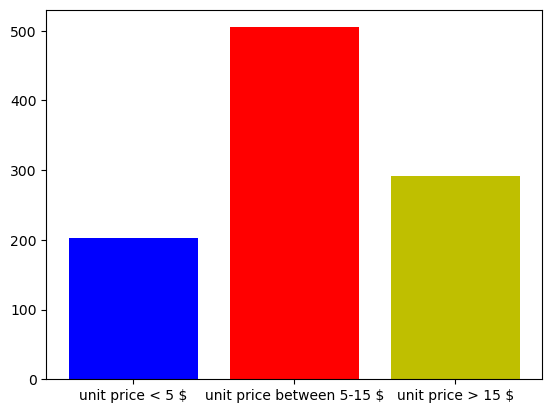

In [18]:
x=('unit price < 5 $','unit price between 5-15 $','unit price > 15 $')
y=(Cheap,Intermediate,Boutique)
plt.bar(x,y,color=('b','r','y'))
plt.show()

<Axes: ylabel='Frequency'>

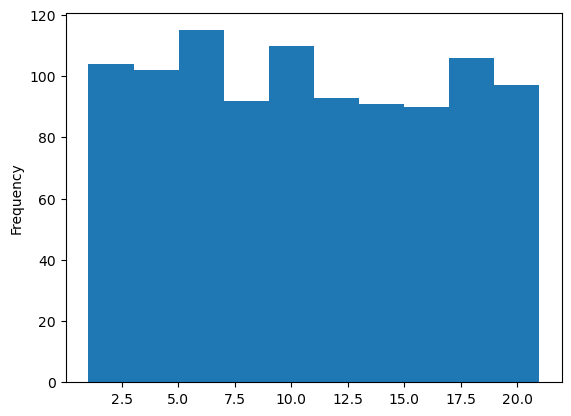

In [19]:
sales['unit_price'].plot(kind='hist')

In [20]:
sales[ sales['product_category'] == 'Personal Care'].groupby('product_name')['quantity'].sum()

product_name
Apple           329
Detergent       403
Notebook        443
Orange Juice    605
Shampoo         498
Name: quantity, dtype: int64

In [21]:
sales.groupby('product_name')['product_category'].value_counts()

product_name  product_category
Apple         Beverages           40
              Household           40
              Stationery          39
              Personal Care       34
              Fruits              32
Detergent     Fruits              41
              Household           41
              Stationery          38
              Beverages           37
              Personal Care       32
Notebook      Beverages           45
              Personal Care       41
              Fruits              39
              Stationery          39
              Household           30
Orange Juice  Personal Care       54
              Household           47
              Fruits              42
              Stationery          34
              Beverages           31
Shampoo       Fruits              55
              Stationery          48
              Personal Care       47
              Household           40
              Beverages           34
Name: count, dtype: int64

In [22]:
checkapple=sales.loc[(sales['product_category']=='Fruits')&(sales['product_name']=='Apple')]
checkshampoo=sales.loc[(sales['product_category']=='Personal Care')&(sales['product_name']=='Shampoo')]
checkNotebook=sales.loc[(sales['product_category']=='Stationery')&(sales['product_name']=='Notebook')]
checkDetergent=sales.loc[(sales['product_category']=='Household')&(sales['product_name']=='Detergent')]
checkOrangeJuice=sales.loc[(sales['product_category']=='Beverages')&(sales['product_name']=='Orange Juice')]

print('I check if there is a match by product and category column If a product matches the product category:','\n', 'apple:',len(checkapple),'\n','Shampoo:',len(checkshampoo),'\n','Notebook:',len(checkNotebook),'\n','Detergent:',len(checkDetergent),'\n','Orange Juice:',len(checkOrangeJuice))

I check if there is a match by product and category column If a product matches the product category: 
 apple: 32 
 Shampoo: 47 
 Notebook: 39 
 Detergent: 41 
 Orange Juice: 31


##### I see that there is an error in the table.
##### And from what I see more than 70 percent there is an error that the product is not matched to the category and therefore a new table needs to be corrected and converted to a product that matches the product category

In [23]:
new_sales = sales.copy()

new_sales.loc[new_sales['product_name'] == 'Apple', 'product_category'] = 'Fruits'
new_sales.loc[new_sales['product_name'] == 'Orange Juice', 'product_category'] = 'Beverages'
new_sales.loc[new_sales['product_name'] == 'Notebook', 'product_category'] = 'Stationery'
new_sales.loc[new_sales['product_name'] == 'Detergent', 'product_category'] = 'Household'
new_sales.loc[new_sales['product_name'] == 'Shampoo', 'product_category'] = 'Personal Care'

In [24]:
new_sales.head(10)

,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2
5,6,A,Chicago,Normal,Male,Shampoo,Personal Care,11.24,9,7.08,108.24,0
6,7,A,Chicago,Normal,Male,Shampoo,Personal Care,10.71,1,0.75,11.46,0
7,8,B,Los Angeles,Normal,Female,Shampoo,Personal Care,18.23,9,11.48,175.55,0
8,9,A,Chicago,Member,Female,Apple,Fruits,14.15,20,19.81,302.81,30
9,10,B,Los Angeles,Member,Male,Shampoo,Personal Care,18.42,19,24.50,374.48,37


In [30]:
new_sales.groupby('product_name')['product_category'].value_counts()

product_name  product_category
Apple         Fruits              185
Detergent     Household           189
Notebook      Stationery          194
Orange Juice  Beverages           208
Shampoo       Personal Care       224
Name: count, dtype: int64

## The name of the winning product, and how many units of it were sold?

In [25]:
new_sales.groupby('product_name')['quantity'].sum().sort_values(ascending=False)

product_name
Shampoo         2238
Orange Juice    2183
Notebook        2165
Detergent       2010
Apple           1741
Name: quantity, dtype: int64

<Axes: ylabel='quantity'>

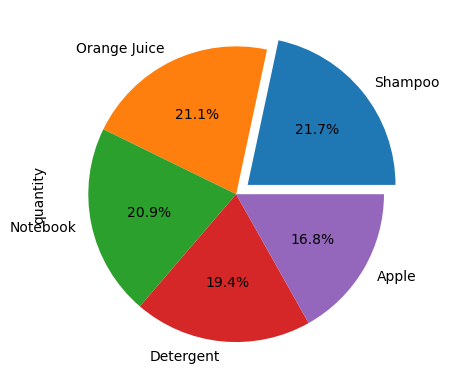

In [26]:
e = [0.1, 0, 0, 0, 0]
new_sales.groupby('product_name')['quantity'].sum().sort_values(ascending=False).plot(kind='pie',explode=e,autopct='%1.1f%%')

In [27]:
new_sales.groupby('product_category')['total_price'].sum().sort_values(ascending=False)

product_category
Personal Care    27041.36
Stationery       24792.98
Beverages        24686.46
Household        22449.07
Fruits           19614.03
Name: total_price, dtype: float64

#### A table showing the average tax in each of the three cities?

In [28]:
new_sales.groupby('city')['tax'].mean().sort_values(ascending=False)

city
Chicago        8.442485
New York       7.650436
Los Angeles    7.178650
Name: tax, dtype: float64